# Tree based separation


In [26]:
from sklearn.model_selection import ParameterGrid

param_grid = {'eps': [0.1, 0.2, 0.5], 'min_samples': [5, 10, 20]}
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(metric='precomputed', **params)
    clusters = dbscan.fit_predict(distance_matrix)
    print(f"Params: {params}, Unique clusters: {np.unique(clusters)}")


Params: {'eps': 0.1, 'min_samples': 5}, Unique clusters: [-1  0  1  2  3]
Params: {'eps': 0.1, 'min_samples': 10}, Unique clusters: [-1  0  1]
Params: {'eps': 0.1, 'min_samples': 20}, Unique clusters: [-1  0  1]
Params: {'eps': 0.2, 'min_samples': 5}, Unique clusters: [-1  0  1  2  3]
Params: {'eps': 0.2, 'min_samples': 10}, Unique clusters: [-1  0  1  2]
Params: {'eps': 0.2, 'min_samples': 20}, Unique clusters: [-1  0  1]
Params: {'eps': 0.5, 'min_samples': 5}, Unique clusters: [-1  0  1  2  3  4]
Params: {'eps': 0.5, 'min_samples': 10}, Unique clusters: [-1  0  1  2  3]
Params: {'eps': 0.5, 'min_samples': 20}, Unique clusters: [-1  0  1  2]


In [27]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5743630572468256


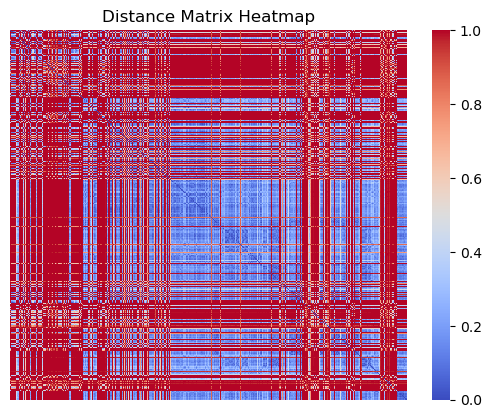

Cluster distribution:
Cluster
 2    336
-1    112
 1    108
 0     26
 3     10
Name: count, dtype: int64


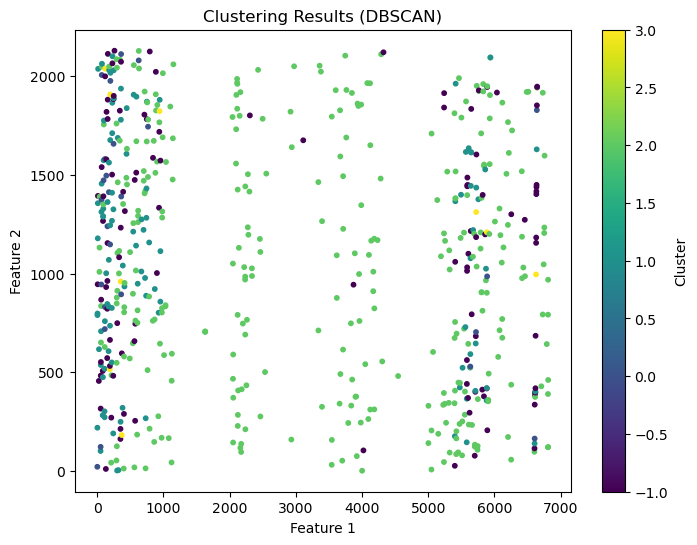

In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../../data/cleaned_data/Covariates.csv")

# Step 1: Encode non-numeric columns
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Step 2: Handle missing values
df = df.dropna()

# Convert DataFrame to NumPy array
X = df.to_numpy()

# Step 3: Generate pseudo-labels using k-means
n_clusters = 8  # Choose an appropriate number of clusters for your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pseudo_labels = kmeans.fit_predict(X)

# Step 4: Train Random Forest with pseudo-labels
n_trees = 100
rf = RandomForestClassifier(n_estimators=n_trees, max_depth=10, random_state=42)
rf.fit(X, pseudo_labels)

# Step 5: Generate the proximity matrix
leaf_node_ids = np.array([tree.apply(X) for tree in rf.estimators_]).T

# Initialize the proximity matrix
proximity_matrix = np.zeros((len(df), len(df)))

# Calculate the proximity matrix
for i in range(n_trees):
    same_leaf = np.equal.outer(leaf_node_ids[:, i], leaf_node_ids[:, i])
    proximity_matrix += same_leaf

# Normalize the proximity matrix
proximity_matrix /= n_trees
distance_matrix = 1 - proximity_matrix  # Distance = 1 - proximity

# Step 6: Visualize the distance matrix
sns.heatmap(distance_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Distance Matrix Heatmap')
plt.show()

# Step 7: Apply DBSCAN clustering
dbscan = DBSCAN(metric='precomputed', eps=0.3, min_samples=8)  # Tune `eps` and `min_samples` as needed
clusters = dbscan.fit_predict(distance_matrix)

# Step 8: Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Step 9: Display cluster distribution and results
print("Cluster distribution:")
print(df['Cluster'].value_counts())

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=10)
plt.title('Clustering Results (DBSCAN)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


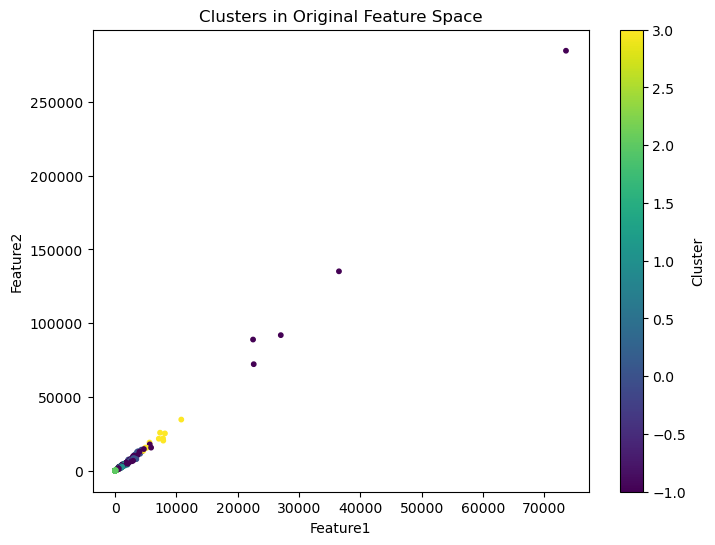

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 10], df.iloc[:,11], c=df['Cluster'], cmap='viridis', s=10)
plt.title('Clusters in Original Feature Space')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.colorbar(label='Cluster')
plt.show()


In [36]:
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]
cluster_3 = df[df['Cluster'] == 3]
cluster_4 = df[df['Cluster'] == 4]
cluster_5 = df[df['Cluster'] == 5]
cluster_6 = df[df['Cluster'] == 6]
cluster_7 = df[df['Cluster'] == 7]
cluster_8 = df[df['Cluster'] == 8]
cluster_9 = df[df['Cluster'] == 9]

cluster_list = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6, cluster_7, cluster_8, cluster_9]

for cluster in cluster_list: 
    print(cluster.index.size) 

26
108
336
10
0
0
0
0
0
0


In [ ]:
for 